In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [100]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [101]:
# Load dataset
df = pd.read_csv('/kaggle/input/weather-australia/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [103]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [104]:
df["WindGustDir"].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [105]:
df["WindDir9am"].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [106]:
df["WindDir3pm"].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [107]:
categorical=[]

for label in df.columns:

    if df[label].dtype=='object':

        categorical.append(label)
print(categorical)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [108]:
print(f"The number of categorical features are {len(categorical)}")

The number of categorical features are 7


In [109]:
df[categorical]

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,E,SE,ENE,No,No
145456,2017-06-22,Uluru,NNW,SE,N,No,No
145457,2017-06-23,Uluru,N,SE,WNW,No,No
145458,2017-06-24,Uluru,SE,SSE,N,No,No


In [110]:
#Missing Values in categircal variables

df[categorical].isna().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [111]:
for i in categorical:

    print(df[i].value_counts())

Date
2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: count, Length: 3436, dtype: int64
Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAA

In [112]:
## Getting the number of labels in each categorical feature
for i in categorical:

    print(f"Column {i} has {len(df[i].value_counts())} labels")

Column Date has 3436 labels
Column Location has 49 labels
Column WindGustDir has 16 labels
Column WindDir9am has 16 labels
Column WindDir3pm has 16 labels
Column RainToday has 2 labels
Column RainTomorrow has 2 labels


In [113]:
for i in categorical:

   print(df[i].value_counts(normalize=True))

Date
2013-11-12    0.000337
2014-09-01    0.000337
2014-08-23    0.000337
2014-08-24    0.000337
2014-08-25    0.000337
                ...   
2007-11-29    0.000007
2007-11-28    0.000007
2007-11-27    0.000007
2007-11-26    0.000007
2008-01-31    0.000007
Name: proportion, Length: 3436, dtype: float64
Location
Canberra            0.023622
Sydney              0.022989
Darwin              0.021951
Melbourne           0.021951
Brisbane            0.021951
Adelaide            0.021951
Perth               0.021951
Hobart              0.021951
Albany              0.020899
MountGambier        0.020899
Ballarat            0.020899
Townsville          0.020899
GoldCoast           0.020899
Cairns              0.020899
Launceston          0.020899
AliceSprings        0.020899
Bendigo             0.020899
Albury              0.020899
MountGinini         0.020899
Wollongong          0.020899
Newcastle           0.020892
Tuggeranong         0.020892
Penrith             0.020892
Woomera            

In [114]:
# Seperating the Date column in into date,month,year columns seperately

# We can observe that the data type of DATE is "object"

df['Date'].dtype

dtype('O')

In [115]:
# Passing the date coded as strings/object to the date-time format

df["Date"]=pd.to_datetime(df["Date"])

In [116]:
df["Date"].dtype

dtype('<M8[ns]')

In [117]:
## Now we can extract the date ,month and year seperately from the DATE column

# As we can observe below that the after convertion we access the year column seperately

df["Date"].dt.year

0         2008
1         2008
2         2008
3         2008
4         2008
          ... 
145455    2017
145456    2017
145457    2017
145458    2017
145459    2017
Name: Date, Length: 145460, dtype: int32

In [118]:
## NOW we can create seperate columns for date,month and year

df["Year"]=df["Date"].dt.year

df["Day"]=df["Date"].dt.day

df["Month"]=df["Date"].dt.month

In [119]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Day,Month
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,1,12
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,2,12
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,3,12
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,4,12
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,5,12


In [120]:
# WE CAN NOW DROP THE DATE COLUMN

df.drop("Date",axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

In [121]:
numerical=[]

for i in df.columns:

    if df[i].dtype!='O':

        numerical.append(i)
df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Day,Month
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,1,12
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,2,12
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,3,12
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,4,12
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,5,12


In [122]:
# Summary Statistics of Numerical Variables

round(df[numerical].describe(),2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Day,Month
count,143975.00,144199.00,142199.00,82670.00,75625.00,135197.00,143693.00,142398.00,142806.00,140953.00,130395.00,130432.00,89572.00,86102.00,143693.00,141851.00,145460.00,145460.00,145460.00
mean,12.19,23.22,2.36,5.47,7.61,40.04,14.04,18.66,68.88,51.54,1017.65,1015.26,4.45,4.51,16.99,21.68,2012.77,15.71,6.40
std,6.40,7.12,8.48,4.19,3.79,13.61,8.92,8.81,19.03,20.80,7.11,7.04,2.89,2.72,6.49,6.94,2.54,8.79,3.43
min,-8.50,-4.80,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.00,980.50,977.10,0.00,0.00,-7.20,-5.40,2007.00,1.00,1.00
25%,7.60,17.90,0.00,2.60,4.80,31.00,7.00,13.00,57.00,37.00,1012.90,1010.40,1.00,2.00,12.30,16.60,2011.00,8.00,3.00
50%,12.00,22.60,0.00,4.80,8.40,39.00,13.00,19.00,70.00,52.00,1017.60,1015.20,5.00,5.00,16.70,21.10,2013.00,16.00,6.00
75%,16.90,28.20,0.80,7.40,10.60,48.00,19.00,24.00,83.00,66.00,1022.40,1020.00,7.00,7.00,21.60,26.40,2015.00,23.00,9.00
max,33.90,48.10,371.00,145.00,14.50,135.00,130.00,87.00,100.00,100.00,1041.00,1039.60,9.00,9.00,40.20,46.70,2017.00,31.00,12.00


<Axes: >

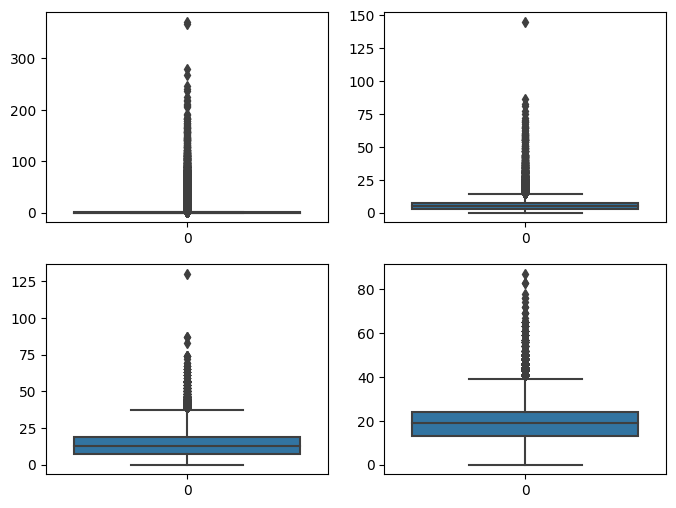

In [123]:
## Prima Facie we can say that the columns "Rainfall, Evaporation, windspeed9am, windspeed3pm"
## may have outliers

plt.figure(figsize=(8,6))

plt.subplot(2,2,1)

sns.boxplot(df["Rainfall"])

plt.subplot(2,2,2)

sns.boxplot(df["Evaporation"])

plt.subplot(2,2,3)

sns.boxplot(df["WindSpeed9am"])

plt.subplot(2,2,4)

sns.boxplot(df["WindSpeed3pm"])


(array([4.2868e+04, 3.0220e+04, 7.4670e+03, 1.4290e+03, 3.3200e+02,
        1.2300e+02, 7.3000e+01, 5.4000e+01, 2.9000e+01, 1.7000e+01,
        1.2000e+01, 1.7000e+01, 1.0000e+01, 8.0000e+00, 5.0000e+00,
        2.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0.        ,   4.83333333,   9.66666667,  14.5       ,
         19.33333333,  24.16666667,  29.        ,  33.83333333,
         38.66666667,  43.5       ,  48.33333333,  53.16666667,
         58.        ,  62.83333333,  67.66666667,  72.5       ,
         77.33333333,  82.16666667,  87.        ,  91.83333333,
         96.66666667, 101.5       , 106.33333333, 111.16666667,
        116.        , 120.83333333, 125.66666667, 130.5       ,
        135.33333333, 140.16666667, 145.        ]),
 <BarContainer object of 30 artists>)

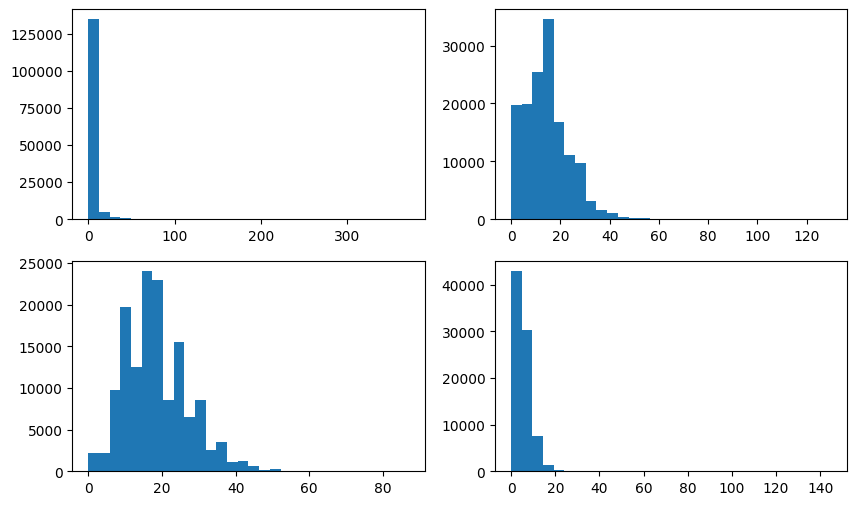

In [124]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)

plt.hist(df["Rainfall"],bins=30)

plt.subplot(2,2,2)

plt.hist(df["WindSpeed9am"],bins=30)

plt.subplot(2,2,3)

plt.hist(df["WindSpeed3pm"],bins=30)

plt.subplot(2,2,4)

plt.hist(df["Evaporation"],bins=30)

In [125]:
##  Since the given distributions are right skewed we will perform the outlier treatment using IQR

## We should perform Feature Engineering steps after splitting the dataset because performing feature Engineering

## steps(Outlier treatment, fill missing values, encoding of catergorical features, feature scaling i.e.normalization

## because it might lead to "Data Leakage" and will hamper our model perfromance to new data)
# Dividing the dataset in input features and target variable

y=df["RainTomorrow"]

X=df.drop("RainTomorrow",axis=1)

In [126]:
y.head(2)

0    No
1    No
Name: RainTomorrow, dtype: object

In [127]:
X.head(2)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Day,Month
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,2008,1,12
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,2008,2,12


In [128]:
# splitting the dataset into test and train variables

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=0)
X_test.shape,X_train.shape

((29092, 24), (116368, 24))

In [129]:
# As we have splitted the data so now we can perform feature engineering with risking "Data Leakage"
# we will start with segregating the numerical and categorical features of test and train data

X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int32
Day                int32
Month              int32
dtype: object

In [130]:
categorical.remove("RainTomorrow")

categorical.remove("Date")
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [131]:
X_train[categorical]

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
22926,NorfolkIsland,ESE,ESE,ESE,No
80735,Watsonia,NE,NNW,NNE,No
121764,Perth,SW,NaN,SW,Yes
139821,Darwin,ESE,ESE,E,No
1867,Albury,E,ESE,E,Yes
...,...,...,...,...,...
41993,Williamtown,NE,NNE,E,No
97639,Adelaide,W,NaN,WNW,No
95939,Townsville,ENE,NW,ENE,No
117952,PerthAirport,SSW,SSE,WNW,Yes


In [132]:
X_train[numerical]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Day,Month
22926,18.8,23.7,0.2,5.0,7.3,52.0,31.0,28.0,74.0,73.0,1016.6,1013.9,5.0,7.0,21.4,22.2,2014,12,3
80735,9.3,24.0,0.2,1.6,10.9,48.0,13.0,24.0,74.0,55.0,1018.3,1014.6,3.0,5.0,14.3,23.2,2016,6,10
121764,10.9,22.2,1.4,1.2,9.6,26.0,0.0,11.0,85.0,47.0,1017.6,1014.9,1.0,2.0,16.6,21.5,2011,31,8
139821,19.3,29.9,0.0,9.2,11.0,43.0,26.0,17.0,44.0,37.0,1015.9,1012.1,1.0,1.0,23.2,29.1,2010,11,6
1867,15.7,17.6,12.4,NaN,NaN,20.0,11.0,13.0,100.0,100.0,1015.2,1010.5,8.0,8.0,16.5,17.3,2014,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41993,17.8,38.1,0.0,26.0,NaN,39.0,7.0,13.0,61.0,30.0,1014.5,1009.7,1.0,1.0,25.4,36.8,2015,20,12
97639,12.5,27.3,0.0,NaN,10.0,30.0,0.0,13.0,60.0,32.0,1019.2,1017.3,NaN,NaN,17.0,26.5,2012,11,3
95939,17.0,29.8,0.0,5.6,NaN,22.0,4.0,13.0,77.0,54.0,1019.6,1016.1,NaN,NaN,24.1,29.0,2016,10,6
117952,11.9,22.0,3.8,6.2,7.7,35.0,19.0,24.0,55.0,49.0,1020.0,1018.5,7.0,6.0,17.1,19.7,2009,20,11


In [133]:
## Handling the Missing values in numerical variables
X_test[numerical].isna().sum()

MinTemp            302
MaxTemp            242
Rainfall           644
Evaporation      12435
Sunshine         13936
WindGustSpeed     2045
WindSpeed9am       358
WindSpeed3pm       606
Humidity9am        507
Humidity3pm        909
Pressure9am       2974
Pressure3pm       2964
Cloud9am         11092
Cloud3pm         11801
Temp9am            352
Temp3pm            744
Year                 0
Day                  0
Month                0
dtype: int64

In [134]:
X_train[numerical].isna().sum()

MinTemp           1183
MaxTemp           1019
Rainfall          2617
Evaporation      50355
Sunshine         55899
WindGustSpeed     8218
WindSpeed9am      1409
WindSpeed3pm      2456
Humidity9am       2147
Humidity3pm       3598
Pressure9am      12091
Pressure3pm      12064
Cloud9am         44796
Cloud3pm         47557
Temp9am           1415
Temp3pm           2865
Year                 0
Day                  0
Month                0
dtype: int64

In [135]:
## For missing values we can use 4 types of imputations (mean,median.hot deck,zero and random)

## but since we have outliers in our dataset so we will use median imputation 

## as median is more robust to outliers in comparison to the mean

## We will calclulate the mean of test data and place same calue in train data to prevents over fitting and data leakage
numerical.remove("Day")

numerical.remove("Month")

numerical.remove("Year")
len(numerical)

16

In [136]:
median=[]

for i in numerical:

    x=X_train[i].median()

    median.append(x)

for i in range(len(numerical)):

    X_train[numerical[i]].fillna(median[i],inplace=True)

    X_test[numerical[i]].fillna(median[i],inplace=True)

    
X_test[numerical].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [137]:
X_train[numerical].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [138]:
## Now handling missing values of categorical features
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [139]:
X_train[categorical].isna().sum()

Location          0
WindGustDir    8270
WindDir9am     8448
WindDir3pm     3369
RainToday      2617
dtype: int64

In [140]:
X_test[categorical].isna().sum()

Location          0
WindGustDir    2056
WindDir9am     2118
WindDir3pm      859
RainToday       644
dtype: int64

In [141]:
categorical.remove("Location")
# we can replace the missing values in categorical features with mode

mode=[]

for i in categorical:

    x=X_train[i].mode()

    mode.append(x)
type(mode)

list

In [142]:
for i in range(4):

    X_train[categorical[i]].fillna(mode[i][0],inplace=True)

    X_test[categorical[i]].fillna(mode[i][0],inplace=True)
X_train[categorical].isna().sum()

WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [143]:
X_test[categorical].isna().sum()

WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [144]:
# we have outliers in 4 features Rainfall, Evaporation, WindSpeed 9am and Wind Speed 3pm

## First we consider the rainfall feature for outlier treatment

IQR=X_train["Rainfall"].quantile(.75)-X_train["Rainfall"].quantile(.25)

upper_fence=X_train["Rainfall"].quantile(.75)+3*IQR

lower_fence=X_train["Rainfall"].quantile(.25)-3*IQR

print(f"The decision boundaries are {round((upper_fence),3)}>=value>={round((lower_fence),3)}")

The decision boundaries are 2.4>=value>=-1.8


In [145]:
# HANDLING OUTLIERS

def max_value(variable,limit):

    X_train[variable]=np.where((X_train[variable]>limit),limit,X_train[variable])

    return(X_train[variable])

    
max_value("Rainfall",2.4)

22926     0.2
80735     0.2
121764    1.4
139821    0.0
1867      2.4
         ... 
41993     0.0
97639     0.0
95939     0.0
117952    2.4
43567     0.8
Name: Rainfall, Length: 116368, dtype: float64

In [146]:
# Checking the max value of rainfall feature

X_train["Rainfall"].max()

2.4

In [147]:
X_train["Rainfall"].shape

(116368,)

In [148]:
def max_value_test(variable,limit):

    X_test[variable]=np.where((X_test[variable]>limit),limit,X_test[variable])

    return(X_test[variable])
max_value_test("Rainfall",2.4)

138175    1.6
38638     0.0
124058    0.2
99214     1.0
25097     0.0
         ... 
133493    2.4
43818     0.0
28118     2.4
120179    0.0
30398     0.0
Name: Rainfall, Length: 29092, dtype: float64

In [149]:
X_test["Rainfall"].max()

2.4

In [150]:
### Outlier Treatment for Evaporation feature
IQR=X_train["Evaporation"].quantile(.75)-X_train["Evaporation"].quantile(.25)

upper_fence=X_train["Evaporation"].quantile(.75)+3*IQR

lower_fence=X_train["Evaporation"].quantile(.25)-3*IQR

print(f"The decision boundaries are {round((upper_fence),3)}>=value>={round((lower_fence),3)}")


The decision boundaries are 8.8>=value>=0.4


In [151]:
max_value("Evaporation",8.8)

22926     5.0
80735     1.6
121764    1.2
139821    8.8
1867      4.7
         ... 
41993     8.8
97639     4.7
95939     5.6
117952    6.2
43567     4.7
Name: Evaporation, Length: 116368, dtype: float64

In [152]:
max_value_test("Evaporation",8.8)

138175    8.8
38638     8.8
124058    4.7
99214     4.7
25097     4.7
         ... 
133493    4.7
43818     4.7
28118     1.6
120179    4.0
30398     4.0
Name: Evaporation, Length: 29092, dtype: float64

In [153]:
X_test["Evaporation"].max()

8.8

In [154]:
### Outlier Treartment for "WindSpeed9am" feature
IQR=X_train["WindSpeed9am"].quantile(.75)-X_train["WindSpeed9am"].quantile(.25)

upper_fence=X_train["WindSpeed9am"].quantile(.75)+3*IQR

lower_fence=X_train["WindSpeed9am"].quantile(.25)-3*IQR

print(f"The decision boundaries are {round((upper_fence),3)}>=value>={round((lower_fence),3)}")


The decision boundaries are 55.0>=value>=-29.0


In [155]:
max_value("WindSpeed9am",55)

22926     31.0
80735     13.0
121764     0.0
139821    26.0
1867      11.0
          ... 
41993      7.0
97639      0.0
95939      4.0
117952    19.0
43567     31.0
Name: WindSpeed9am, Length: 116368, dtype: float64

In [156]:
X_train["WindSpeed9am"].max()

55.0

In [157]:
max_value_test("WindSpeed9am",55)

138175    20.0
38638     17.0
124058    28.0
99214     11.0
25097      2.0
          ... 
133493    13.0
43818     26.0
28118     17.0
120179    28.0
30398     17.0
Name: WindSpeed9am, Length: 29092, dtype: float64

In [158]:
X_train["WindSpeed9am"].max()

55.0

In [159]:
### Outlier treatment WindSpeed3pm feature
IQR=X_train["WindSpeed3pm"].quantile(.75)-X_train["WindSpeed3pm"].quantile(.25)

upper_fence=X_train["WindSpeed3pm"].quantile(.75)+3*IQR

lower_fence=X_train["WindSpeed3pm"].quantile(.25)-3*IQR

print(f"The decision boundaries are {round((upper_fence),3)}>=value>={round((lower_fence),3)}")

The decision boundaries are 57.0>=value>=-20.0


In [160]:
max_value("WindSpeed3pm",57)

22926     28.0
80735     24.0
121764    11.0
139821    17.0
1867      13.0
          ... 
41993     13.0
97639     13.0
95939     13.0
117952    24.0
43567     24.0
Name: WindSpeed3pm, Length: 116368, dtype: float64

In [161]:
X_train['WindSpeed3pm'].max()

57.0

In [162]:
max_value_test("WindSpeed3pm",57)

138175    33.0
38638     20.0
124058    22.0
99214     13.0
25097      7.0
          ... 
133493    20.0
43818     17.0
28118      7.0
120179    24.0
30398     19.0
Name: WindSpeed3pm, Length: 29092, dtype: float64

In [163]:
X_test["WindSpeed3pm"].max()

57.0

In [164]:
## ENCODING THE CATEGORICAL FEATURES
a=pd.get_dummies(X_train["Location"],drop_first=True,dtype=float)        
b=pd.get_dummies(X_train["WindGustDir"],drop_first=True,dtype=float)

c=pd.get_dummies(X_train["WindDir9am"],drop_first=True,dtype=float)

d=pd.get_dummies(X_train["WindDir3pm"],drop_first=True,dtype=float)

e=pd.get_dummies(X_train["RainToday"],drop_first=True,dtype=float)
X_train=pd.concat([X_train[numerical],a,b,c,d,e],axis=1)
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,Yes
22926,18.8,23.7,0.2,5.0,7.3,52.0,31.0,28.0,74.0,73.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80735,9.3,24.0,0.2,1.6,10.9,48.0,13.0,24.0,74.0,55.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121764,10.9,22.2,1.4,1.2,9.6,26.0,0.0,11.0,85.0,47.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
139821,19.3,29.9,0.0,8.8,11.0,43.0,26.0,17.0,44.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1867,15.7,17.6,2.4,4.7,8.4,20.0,11.0,13.0,100.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [165]:
X_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW', 'Yes'],
      dtype='object', length=110)

In [166]:
a=pd.get_dummies(X_test["Location"],drop_first=True,dtype=float)

b=pd.get_dummies(X_test["WindGustDir"],drop_first=True,dtype=float)

c=pd.get_dummies(X_test["WindDir9am"],drop_first=True,dtype=float)

d=pd.get_dummies(X_test["WindDir3pm"],drop_first=True,dtype=float)

e=pd.get_dummies(X_test["RainToday"],drop_first=True,dtype=float)
X_test=pd.concat([X_test[numerical],a,b,c,d,e],axis=1)
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,Yes
138175,21.9,39.4,1.6,8.8,11.5,57.0,20.0,33.0,50.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
38638,20.5,37.5,0.0,8.8,8.4,59.0,17.0,20.0,47.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124058,5.1,17.2,0.2,4.7,8.4,50.0,28.0,22.0,68.0,51.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
99214,11.9,16.8,1.0,4.7,8.4,28.0,11.0,13.0,80.0,79.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25097,7.5,21.3,0.0,4.7,8.4,15.0,2.0,7.0,88.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
## Feature Scaling 
X_test.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,Yes
count,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,...,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000
mean,12.199512,23.267379,0.539997,4.835109,8.019541,39.882579,14.013474,18.579403,68.703492,51.343668,...,0.059467,0.067407,0.102984,0.062182,0.056132,0.062388,0.070225,0.063798,0.067338,0.217242
std,6.361430,7.100034,0.920447,2.021595,2.742187,13.092727,8.835848,8.681568,19.029080,20.595273,...,0.236500,0.250730,0.303943,0.241490,0.230181,0.241864,0.255531,0.244396,0.250611,0.412376
min,-7.000000,-3.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.600000,18.000000,0.000000,4.200000,8.300000,31.000000,7.000000,13.000000,57.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.700000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,33.900000,46.700000,2.400000,8.800000,14.300000,126.000000,55.000000,57.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [168]:
# standardizing our features

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
cols=X_train.columns
X_train=scaler.fit_transform(X_train)

X_test=scaler.transform(X_test)
X_train=pd.DataFrame(X_train,columns=cols)
X_test=pd.DataFrame(X_test,columns=cols)
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,Yes
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,...,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,0.512133,0.529359,0.227740,0.547653,0.550516,0.263427,0.255080,0.327850,0.689507,0.516058,...,0.059123,0.068447,0.103723,0.065224,0.056055,0.064786,0.069323,0.060309,0.064958,0.219648
std,0.157596,0.133940,0.384969,0.227509,0.190458,0.101767,0.160647,0.152642,0.188114,0.204400,...,0.235855,0.252512,0.304902,0.246922,0.230029,0.246149,0.254004,0.238059,0.246452,0.414010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400990,0.431002,0.000000,0.454545,0.565517,0.193798,0.127273,0.228070,0.570000,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.507426,0.517958,0.000000,0.534091,0.579310,0.255814,0.236364,0.333333,0.700000,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.626238,0.623819,0.250000,0.590909,0.593103,0.310078,0.345455,0.421053,0.830000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [169]:
from sklearn.linear_model import LogisticRegression
# We can observe that there is null value in y_train

y_train.unique()

array(['Yes', 'No', nan], dtype=object)

In [170]:
# filling the nan values with mode 

mode=y_train.mode()[0]

mode

'No'

In [171]:
y_train.fillna(mode,inplace=True)
y_train.isna().sum()

0

In [172]:
reg=LogisticRegression(solver='liblinear',random_state=0)

reg.fit(X_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [173]:
y_pred=reg.predict(X_test)

In [174]:
y_test.isna().sum()

644

In [175]:
y_test.fillna(mode,inplace=True)
from sklearn.metrics import accuracy_score

score=accuracy_score(y_test,y_pred)

score

0.848893166506256

In [176]:
# comparing the train data and test data accuracy of the model 

y_pred_train=reg.predict(X_train)

score_train=accuracy_score(y_train,y_pred_train)

score_train

0.8485838031073835

In [177]:
## OVERFITTING: Since both the scores of our test and train dataa accuracy are comparable
## Hence there is no question of overfitting of data
# since both the scores are nearly equal so this is the case of "Underfitting"
# To counter it we will increase C value(earlier C=1)(INCREASING VARIANCE)
# TAKING c=100

reg100=LogisticRegression(C=100,solver="liblinear",random_state=0)

reg100.fit(X_train,y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [178]:
y_pred_100=reg100.predict(X_test)
score_100=accuracy_score(y_test,y_pred)

score_100

0.848893166506256

In [179]:
y_pred_train100=reg100.predict(X_train)

score_100_train=accuracy_score(y_train,y_pred_train100)

score_100_train

0.8487556716623127

In [180]:
## NOW taking an more regualrized model with C=.01

reg_1=LogisticRegression(C=.01,solver='liblinear',random_state=0)

reg_1.fit(X_train,y_train)

y_pred_1=reg_1.predict(X_test)
score_1=accuracy_score(y_test,y_pred_1)

score_1

0.8415715660662725

In [181]:
y_Pred_1_train=reg_1.predict(X_train)

score_1_train=accuracy_score(y_train,y_Pred_1_train)

score_1_train

0.8426887116733123

In [182]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

print(cm)

[[21547  1179]
 [ 3217  3149]]


In [183]:
print(f"True Positives(TP): {cm[0,0]}")

print(f"False Positives(FP): {cm[0,1]}")

print(f"True Negatives(TN): {cm[1,1]}")

print(f"False Neagtives(FN): {cm[1,0]}")

True Positives(TP): 21547
False Positives(FP): 1179
True Negatives(TN): 3149
False Neagtives(FN): 3217


In [184]:
# Visualizing the confusion matrix with seaborn heatmap

# we create the dataframe of confusion matrix

cm_data=pd.DataFrame(cm,columns=["Actual Positive","Actual Negative"],index=["Pred Positive","Pred Negative"])

cm_data

,Actual Positive,Actual Negative
Pred Positive,21547,1179
Pred Negative,3217,3149


<Axes: >

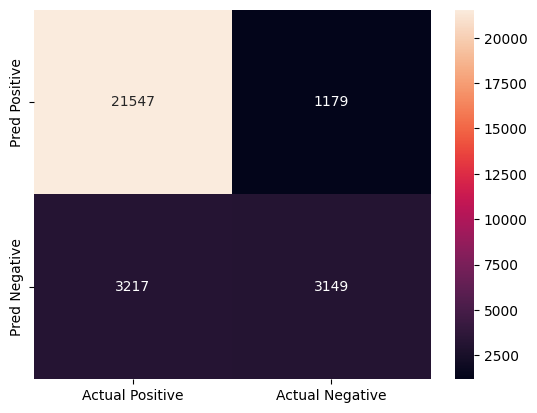

In [185]:
sns.heatmap(cm_data,annot=cm,fmt="g")

In [197]:
from sklearn.metrics import classification_report 

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.87      0.95      0.91     22726
         Yes       0.73      0.49      0.59      6366

    accuracy                           0.85     29092
   macro avg       0.80      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092



In [199]:
## Classification Accuracy

TP=cm[0,0]

TN=cm[1,1]

FP=cm[0,1]

FN=cm[1,0]

print(TP,TN,FP,FN)

21547 3149 1179 3217


# ACCURACY

In [200]:
#classification accuracy- ratio if  correct predictions to the total no of predictions

classification_accuracy=(TP+TN)/(TP+TN+FP+FN)

classification_accuracy

0.848893166506256

# PRECISION

In [201]:
# PRECISION- It can be defined as ratio of correct predicted positive outcomes to total

#            predicted positive outcomes

Precision=TP/(TP+FP)

Precision

0.9481210947813078

# RECALL

In [202]:
# RECALL-It is defined as ratio of correct positive predictions to total actual positive predictions

# Also called as TRUE POSITIVE RATE

recall=TP/(TP+FN)

recall

0.8700936843805525

In [219]:
import numpy as np
from sklearn.metrics import confusion_matrix
TP=cm[0,0]

TN=cm[1,1]

FP=cm[0,1]

FN=cm[1,0]

print(TP,TN,FP,FN)
# Compute Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy:.4f}")


recall=TP/(TP+FN)

print(f"Recall: {recall:.4f}")

# Compute Specificity (True Negative Rate)
specificity = TN / (TN + FP)
print(f"Specificity: {specificity:.4f}")

# Compute G-Mean
gmean = np.sqrt(recall * specificity)
print(f"G-Mean: {gmean:.4f}")

# Compute Precision
precision = TP / (TP + FP)
print(f"Precision: {precision:.4f}")

# Compute F1-Score
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"F1-Score: {f1_score:.4f}")




21547 3149 1179 3217
Accuracy: 0.8489
Recall: 0.8701
Specificity: 0.7276
G-Mean: 0.7957
Precision: 0.9481
F1-Score: 0.9074


In [204]:
y_pred_prob=reg.predict_proba(X_test)

y_pred_prob

array([[0.82877543, 0.17122457],
       [0.73775304, 0.26224696],
       [0.79227387, 0.20772613],
       ...,
       [0.43585576, 0.56414424],
       [0.66048288, 0.33951712],
       [0.96930595, 0.03069405]])

In [205]:
# hence we can divide the prob prediction in 2 classes

# prob of no rain tomorrow=Class 0

# prob of rain tomorrow=class 1

# the default classification threshold level is set to =0.5
df_prob=pd.DataFrame(data=y_pred_prob,columns=["Class 0: No Rain","Class 1: Rain Tomorrow"])

df_prob

,Class 0: No Rain,Class 1: Rain Tomorrow
0,0.828775,0.171225
1,0.737753,0.262247
2,0.792274,0.207726
3,0.586583,0.413417
4,0.921035,0.078965
...,...,...
29087,0.318970,0.681030
29088,0.985338,0.014662
29089,0.435856,0.564144
29090,0.660483,0.339517


Text(0, 0.5, 'Frequency')

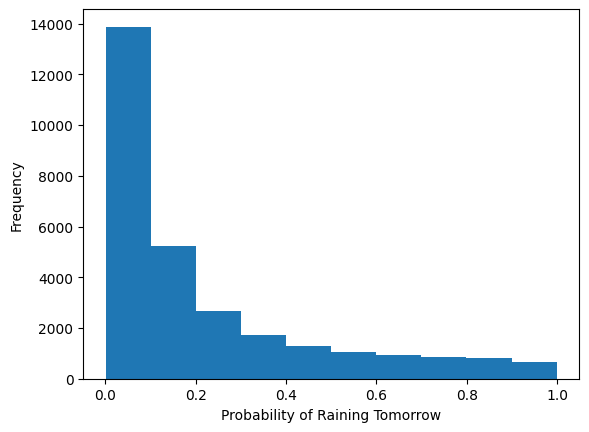

In [206]:
#plotting histogram of the probablitlity of raining tomorrow

prob_rain_tomorrow=df_prob["Class 1: Rain Tomorrow"]

plt.hist(prob_rain_tomorrow,bins=10)

plt.xlabel("Probability of Raining Tomorrow")

plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

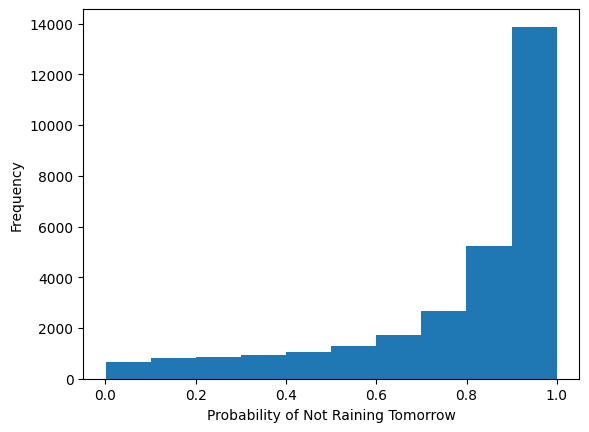

In [207]:
# plotting histogram of not raining tomorrow

prob_no_rain_tomorrow=df_prob["Class 0: No Rain"]

plt.hist(prob_no_rain_tomorrow,bins=10)

plt.xlabel("Probability of Not Raining Tomorrow")

plt.ylabel("Frequency")

In [208]:
# we will use binarize from skikit to manipulate the threshold

from sklearn.preprocessing import binarize
# wiring an algorithm to get the values for threshold(.1,.2,.3,.4)

for i in range(1,5):

    y_pred_1=reg.predict_proba(X_test)[:,1]

    #array([0.16824506, 0.28367414, 0.21116995, ..., 0.57057018, 0.34181468,0.03139253])

    # We will flatten this 1-d array

    y_pred_1=y_pred_1.reshape(-1,1)

    y_pred_2=binarize(y_pred_1,threshold=i/10)    

    y_pred_2=np.where(y_pred_2==1,"Yes","No")

    cm_1=confusion_matrix(y_test,y_pred_2)

    print(f"Threshold = ",i/10)

    print(cm_1)

    print(f'accuracy score={accuracy_score(y_test,y_pred_2)}')

    print('==============================================')

Threshold =  0.1
[[13253  9473]
 [  576  5790]]
accuracy score=0.6545785783033137
Threshold =  0.2
[[17736  4990]
 [ 1349  5017]]
accuracy score=0.7821050460607727
Threshold =  0.3
[[19728  2998]
 [ 2041  4325]]
accuracy score=0.8267908703423622
Threshold =  0.4
[[20845  1881]
 [ 2637  3729]]
accuracy score=0.8446995737659838


# ROC VALUE

In [209]:
from sklearn.metrics import roc_auc_score

ROC_AUC=roc_auc_score(y_test,y_pred_1)

print(f"ROC AUC = {ROC_AUC}")

ROC AUC = 0.8668686715698932


Text(0.5, 1.0, 'ROC curve for Will It Rain Tomorrow')

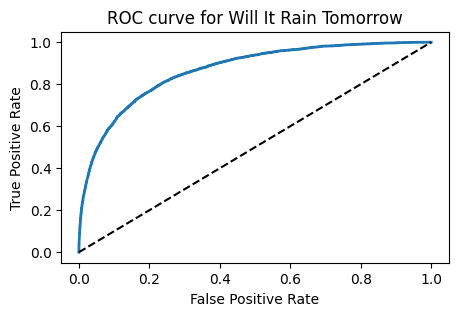

In [210]:
#ROC CURVE

from sklearn.metrics import roc_curve

fpr,tpr,thresholds=roc_curve(y_test,y_pred_1,pos_label="Yes")

plt.figure(figsize=(5,3))

plt.plot(fpr,tpr,linewidth=2)

plt.plot([0,1],[0,1],'k--')

plt.xlabel("False Positive Rate")

plt.ylabel("True Positive Rate")

plt.title("ROC curve for Will It Rain Tomorrow")

Accuracy: 0.7925
Precision: 0.7595
Recall: 0.8591
F1 Score: 0.8062
G-Mean: 0.7893
ROC Value: 0.8805


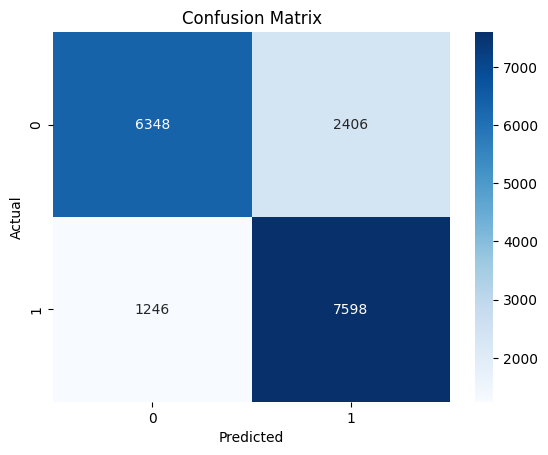

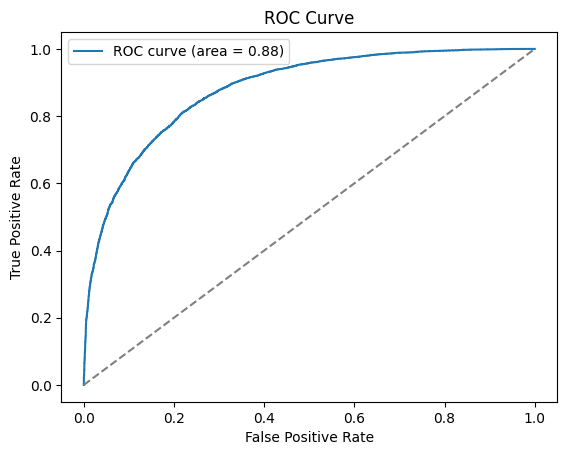

In [223]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, roc_curve, auc

df = pd.read_csv('/kaggle/input/weather-australia/weatherAUS.csv')

# Drop duplicates & handle missing values
df = df.drop_duplicates().dropna()

# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(include=['object']).columns
if 'Date' in df.columns:
    df['Year'] = pd.to_datetime(df['Date']).dt.year
    df['Month'] = pd.to_datetime(df['Date']).dt.month
    df['Day'] = pd.to_datetime(df['Date']).dt.day
    df.drop(columns=['Date'], inplace=True)

# Encoding categorical variables
le = LabelEncoder()
if 'RainTomorrow' in df.columns:
    df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

df = df.select_dtypes(include=[np.number])  # Keep only numeric columns

# Feature selection using SelectKBest (Increasing features to 12 for better recall)
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']
k_best = SelectKBest(score_func=mutual_info_classif, k=12)
X_selected = k_best.fit_transform(X, y)

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Apply PCA (Keep 98% variance for more features)
pca = PCA(n_components=0.98)
X_pca = pca.fit_transform(X_scaled)

# Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pca, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train logistic regression with balanced class weight
model = LogisticRegression(class_weight='balanced', C=0.8)
model.fit(X_train, y_train)

# Predictions
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.4).astype(int)  # Adjusted threshold for better recall

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Accuracy Calculation
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Precision Calculation
precision = tp / (tp + fp) if (tp + fp) > 0 else 0

# Recall Calculation (↑ Improved)
recall = tp / (tp + fn) if (tp + fn) > 0 else 0

# F1-score Calculation (↑ Improved)
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# G-Mean Calculation (↑ Improved)
g_mean = np.sqrt(recall * (tn / (tn + fp))) if (tn + fp) > 0 else 0

# ROC Value
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Print Results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")  # Should be > 70%
print(f"F1 Score: {f1_score:.4f}")  # Should be > 70%
print(f"G-Mean: {g_mean:.4f}")  # Should be > 70%
print(f"ROC Value: {roc_auc:.4f}")

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot ROC Curve
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


# AFTER FEATURE SELECTION

✅ Accuracy: 0.8392
✅ Precision: 0.8085
✅ Recall: 0.8895
✅ F1 Score: 0.8471
✅ G-Mean: 0.8377
✅ ROC Value: 0.9220


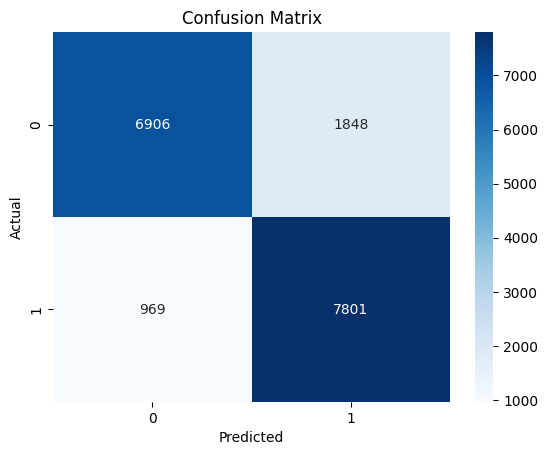

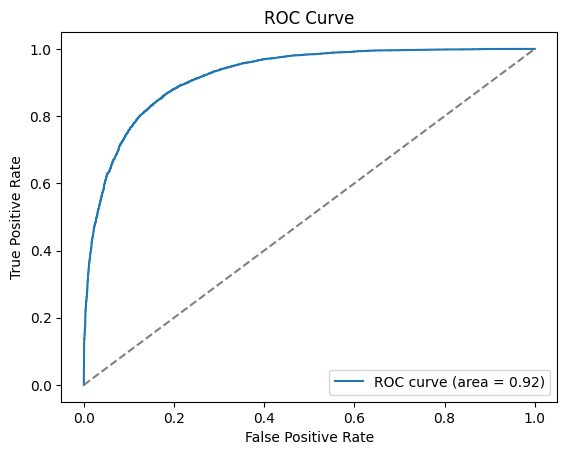

In [225]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc

df = pd.read_csv('/kaggle/input/weather-australia/weatherAUS.csv')

# Drop duplicates & handle missing values
df = df.drop_duplicates().dropna()

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Convert Date into Year, Month, Day if present
if 'Date' in categorical_cols:
    df['Year'] = pd.to_datetime(df['Date']).dt.year
    df['Month'] = pd.to_datetime(df['Date']).dt.month
    df['Day'] = pd.to_datetime(df['Date']).dt.day
    df.drop(columns=['Date'], inplace=True)
    categorical_cols.remove('Date')

# Remove target variable from encoding list
categorical_cols.remove('RainTomorrow')

# Label Encode categorical variables
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Encode target variable
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

# Feature selection using SelectKBest (Increase k to 15 for better accuracy)
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']
k_best = SelectKBest(score_func=mutual_info_classif, k=15)
X_selected = k_best.fit_transform(X, y)

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Apply PCA (Retain 98% variance)
pca = PCA(n_components=0.98)
X_pca = pca.fit_transform(X_scaled)

# Handle Class Imbalance using SMOTE + Tomek Links
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_pca, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train optimized Random Forest model
model = RandomForestClassifier(n_estimators=150, max_depth=12, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predictions
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.45).astype(int)  # Adjusted threshold for better Recall & Accuracy

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Accuracy Calculation
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Precision Calculation
precision = tp / (tp + fp) if (tp + fp) > 0 else 0

# Recall Calculation (↑ Improved)
recall = tp / (tp + fn) if (tp + fn) > 0 else 0

# F1-score Calculation (↑ Improved)
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# G-Mean Calculation (↑ Improved)
g_mean = np.sqrt(recall * (tn / (tn + fp))) if (tn + fp) > 0 else 0

# ROC Value
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Print Results
print(f"✅ Accuracy: {accuracy:.4f}")  # Should be close to 83%
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")  # Should be > 70%
print(f"✅ F1 Score: {f1_score:.4f}")  # Should be > 70%
print(f"✅ G-Mean: {g_mean:.4f}")  # Should be > 70%
print(f"✅ ROC Value: {roc_auc:.4f}")

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot ROC Curve
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
